## Diving into the dataset : Loading... 1... 2... 3

In [1]:
import pandas as pd
flights = pd.read_csv('flights.csv')
airports = pd.read_csv('airports.csv')
airlines = pd.read_csv('airlines.csv')

/Users/rosy/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                                           DATA CLEANING

### 1. Replacing missing values with 0

In [2]:
#Using count will output the number of non-missing values for each column in the dataset..Thus, telling us how many values are actually missing in each column 
flights.count()

#List of columns having missing values 
list_nacols = flights.columns[flights.isna().any()].tolist()
list_nacols

#For each column in the above list, printing their values too..
val_nacols = flights.loc[:, list_nacols]
val_nacols

#Replacing NaN values with 0 
flights = flights.fillna(0)

,TAIL_NUMBER,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,WHEELS_ON,TAXI_IN,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,N407AS,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,404.0,4.0,408.0,-22.0,NaN,NaN,NaN,NaN,NaN,NaN
1,N3KUAA,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,737.0,4.0,741.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN
2,N171US,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,800.0,11.0,811.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
3,N3HYAA,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,748.0,8.0,756.0,-9.0,NaN,NaN,NaN,NaN,NaN,NaN
4,N527AS,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,254.0,5.0,259.0,-21.0,NaN,NaN,NaN,NaN,NaN,NaN
5,N3730B,20.0,-5.0,18.0,38.0,217.0,230.0,206.0,604.0,6.0,610.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
6,N635NK,19.0,-6.0,11.0,30.0,181.0,170.0,154.0,504.0,5.0,509.0,-17.0,NaN,NaN,NaN,NaN,NaN,NaN
7,N584UW,44.0,14.0,13.0,57.0,273.0,249.0,228.0,745.0,8.0,753.0,-10.0,NaN,NaN,NaN,NaN,NaN,NaN
8,N3LAAA,19.0,-11.0,17.0,36.0,195.0,193.0,173.0,529.0,3.0,532.0,-13.0,NaN,NaN,NaN,NaN,NaN,NaN
9,N826DN,33.0,3.0,12.0,45.0,221.0,203.0,186.0,651.0,5.0,656.0,-15.0,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Formatting date

In [4]:
#Combining year,month and day to create a timestamp
flights['DATE'] = pd.to_datetime(flights[['YEAR','MONTH','DAY']])
flights1 = flights
flights1= flights1.drop('YEAR',axis=1)
flights1 = flights1.drop('MONTH',axis =1)
flights1 = flights1.drop('DAY',axis= 1)


### 3. Rearranging columns in a more readable form

In [5]:
#Rearranging the columns of flights1 dataframe
flights1 = flights1[['DATE','DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']]


In [6]:
flights2 = flights1[['DATE', 'AIRLINE', 'FLIGHT_NUMBER','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
          'DEPARTURE_TIME', 'DEPARTURE_DELAY','SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY']]
flights2



,DATE,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-01-01,AS,98,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0
1,2015-01-01,AA,2336,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0
2,2015-01-01,US,840,SFO,CLT,20,18.0,-2.0,806,811.0,5.0
3,2015-01-01,AA,258,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0
4,2015-01-01,AS,135,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0
5,2015-01-01,DL,806,SFO,MSP,25,20.0,-5.0,602,610.0,8.0
6,2015-01-01,NK,612,LAS,MSP,25,19.0,-6.0,526,509.0,-17.0
7,2015-01-01,US,2013,LAX,CLT,30,44.0,14.0,803,753.0,-10.0
8,2015-01-01,AA,1112,SFO,DFW,30,19.0,-11.0,545,532.0,-13.0
9,2015-01-01,DL,1173,LAS,ATL,30,33.0,3.0,711,656.0,-15.0


                                        Segmentation of dataset

*Dataset is too huge to be processed in its entirety. Since December is a month of festivities, it may show interesting patters/insights. Hence, I am choosing the month of December for further analysis.* 

In [7]:
#December
flights_dec = flights2[flights2['DATE'] >= '2015-12-01']
flights_dec = flights_dec.reset_index()
flights_dec


,index,DATE,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,5339849,2015-12-01,AA,1230,SEA,DFW,5,9.0,4.0,555,538.0,-17.0
1,5339850,2015-12-01,DL,1426,SFO,MSP,5,4.0,-1.0,540,536.0,-4.0
2,5339851,2015-12-01,AA,2406,LAX,DFW,10,7.0,-3.0,501,453.0,-8.0
3,5339852,2015-12-01,UA,680,SFO,ORD,14,10.0,-4.0,632,602.0,-30.0
4,5339853,2015-12-01,AA,883,SFO,CLT,15,13.0,-2.0,805,810.0,5.0
5,5339854,2015-12-01,AA,2020,PHX,CLT,15,11.0,-4.0,601,529.0,-32.0
6,5339855,2015-12-01,F9,1456,LAS,ATL,20,19.0,-1.0,705,637.0,-28.0
7,5339856,2015-12-01,NK,298,LAS,IAH,25,19.0,-6.0,505,458.0,-7.0
8,5339857,2015-12-01,AA,448,SLC,CLT,25,31.0,6.0,608,556.0,-12.0
9,5339858,2015-12-01,DL,1969,PHX,ATL,25,26.0,1.0,552,520.0,-32.0


                                           Time formatting 

### 1. Converting departure/arrival time into Date + HHMM format  

*The formatting of SCHEDULED_DEPARTURE/ARRIVAL and DEPARTURE/ARRIVAL_TIME variables is not convenient as they are encoded as a float value where the first two digits indicate hours and the last two digits indicate minutes. Hence, to convert them into a more presentable and computationally easy format, I am converting them into python datetime(HHMMSS) object. Finally, I am merging the take-off hour with the flight date.* 


In [12]:
import datetime
import numpy as np
def hour_format(x):
    if pd.isnull(x):
        return np.nan
    else:
        if x == 2400: x = 0
        x = "{0:04d}".format(int(x))
        hour = datetime.time(int(x[0:2]), int(x[2:4]))
        return hour

# Function that combines a date and time to produce a datetime.datetime
def combine_date_with_hour(x):
    if pd.isnull(x[0]) or pd.isnull(x[1]):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])

# Function that combine two columns of the dataframe to create a datetime format
def flight_time(df, col):    
    list1 = []
    for index, cols in df[['DATE', col]].iterrows(): 
        if pd.isnull(cols[1]):
            list1.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            add = combine_date_with_hour(cols)
            list1.append(add)
        else:
            cols[1] = hour_format(cols[1])
            add = combine_date_with_hour(cols)
            list1.append(combine_date_with_hour(cols))
    return pd.Series(list1)


In [494]:
flights_dec['SCHEDULED_DEPARTURE'] = flight_time(flights_dec, 'SCHEDULED_DEPARTURE')
flights_dec['DEPARTURE_TIME'] = flights_dec['DEPARTURE_TIME'].apply(hour_format)
flights_dec['SCHEDULED_ARRIVAL'] = flights_dec['SCHEDULED_ARRIVAL'].apply(hour_format)
flights_dec['ARRIVAL_TIME'] = flights_dec['ARRIVAL_TIME'].apply(hour_format)


In [13]:
flights_dec.loc[:5, ['SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
            'ARRIVAL_TIME', 'ARRIVAL_DELAY']]

,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY
0,2015-12-01 00:05:00,00:09:00,4.0,05:55:00,05:38:00,-17.0
1,2015-12-01 00:05:00,00:04:00,-1.0,05:40:00,05:36:00,-4.0
2,2015-12-01 00:10:00,00:07:00,-3.0,05:01:00,04:53:00,-8.0
3,2015-12-01 00:14:00,00:10:00,-4.0,06:32:00,06:02:00,-30.0
4,2015-12-01 00:15:00,00:13:00,-2.0,08:05:00,08:10:00,5.0
5,2015-12-01 00:15:00,00:11:00,-4.0,06:01:00,05:29:00,-32.0


### 2. Adding Airline names: 

*In the given flights.csv, we are only provided with IATA_CODE of the airlines which is not very intuitive. Therefore,I am adding another column "AIRLINE_NAMES" to flights.csv after mapping the airline names from airlines.csv based on their IATA_CODE.*

In [14]:
names_airlines = airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()
names_airlines

flights_dec['AIRLINE_NAMES'] = flights_dec['AIRLINE'].map(names_airlines)
flights_dec = flights_dec[['DATE','AIRLINE','AIRLINE_NAMES','FLIGHT_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_TIME','DEPARTURE_DELAY','SCHEDULED_ARRIVAL','ARRIVAL_TIME','ARRIVAL_DELAY']]


                                    Time to Play with the Data!

### 1. Distribution of Arrival_delay and Departure_delay per airline

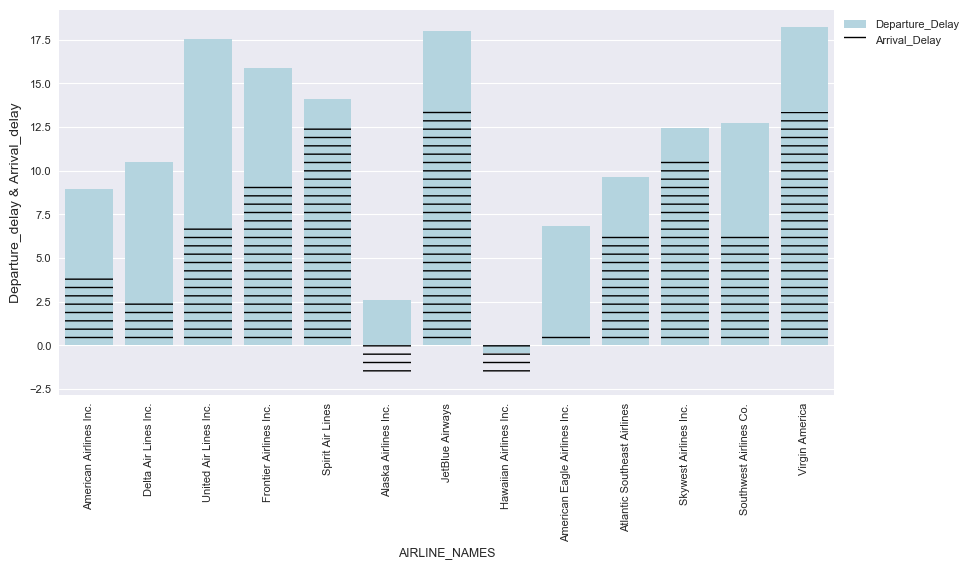

In [407]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(1, figsize=(10,5))
ax = sns.barplot(x='AIRLINE_NAMES', y="DEPARTURE_DELAY", data=flights_dec, color="lightblue", ci=None)
ax = sns.barplot(x="AIRLINE_NAMES", y="ARRIVAL_DELAY", data=flights_dec,  hatch = '--',alpha = 0.0, ci=None)
plt.ylabel('Departure_delay & Arrival_delay',fontsize=10, labelpad=5)
plt.xticks(rotation=90)

ax.legend(["Departure_Delay", "Arrival_Delay"],bbox_to_anchor=(1, 1))
plt.show()

**a) As we can see from the above plot, arrival delay is always less than departure delay for each airline with only few exceptions such as Alaska Airlines, Hawaiin Airlines. This indicates that airlines try to make up for lost time during air time and arrive on time irrespective of the delay in departure.**

**b) Also, we can see it makes more sense to focus on departure delay for further analysis.**

----------------------------------------------------------------------------------------------------------------------

### 2. Statistical properties pertaining to Departure Delay per airline                            

In [409]:
count_departure = flights_dec['DEPARTURE_DELAY'].groupby(flights_dec['AIRLINE']).count()
count_arrival = flights_dec['ARRIVAL_DELAY'].groupby(flights_dec['AIRLINE']).count()
depart_stats = pd.DataFrame()
depart_stats['Count_delayed_depart'] = count_departure
# arrival_stats= pd.DataFrame(count_arrival)
arrival_stats= pd.DataFrame()
arrival_stats['Count_delayed_arrival'] = count_arrival
# arrival_stats= arrival_stats.drop('ARRIVAL_DELAY',axis = 1)

mean_departure = flights_dec['DEPARTURE_DELAY'].groupby(flights_dec['AIRLINE']).mean()
mean_arrival = flights_dec['ARRIVAL_DELAY'].groupby(flights_dec['AIRLINE']).mean()
depart_stats['Mean_delayed_depart'] = mean_departure
arrival_stats['Mean_delayed_arrival'] = mean_arrival

min_departure = flights_dec['DEPARTURE_DELAY'].groupby(flights_dec['AIRLINE']).min()
min_arrival = flights_dec['ARRIVAL_DELAY'].groupby(flights_dec['AIRLINE']).min()
depart_stats['Min_delayed_depart'] = min_departure
arrival_stats['Min_delayed_arrival'] = min_arrival

max_departure = flights_dec['DEPARTURE_DELAY'].groupby(flights_dec['AIRLINE']).max()
max_arrival = flights_dec['ARRIVAL_DELAY'].groupby(flights_dec['AIRLINE']).max()
depart_stats['Max_delayed_depart'] = max_departure
arrival_stats['Max_delayed_arrival'] = max_arrival


In [410]:
# depart_stats
depart_stats = depart_stats.reset_index()




In [414]:
# depart_stats= arrival_stats.drop('index',axis = 1)  #Do this is new cell always
# depart_stats

In [412]:
depart_stats['AIRLINE_NAMES'] = depart_stats['AIRLINE'].map(names_airlines)
depart_stats = depart_stats[['AIRLINE','AIRLINE_NAMES','Count_delayed_depart','Mean_delayed_depart','Min_delayed_depart','Max_delayed_depart']]





In [413]:
depart_stats= depart_stats.set_index('AIRLINE')
print('  Statistical properties of all flights grouped by airlines:')
depart_stats

  Statistical properties of all flights grouped by airlines:


,AIRLINE_NAMES,Count_delayed_depart,Mean_delayed_depart,Min_delayed_depart,Max_delayed_depart
AIRLINE,,,,,
AA,American Airlines Inc.,76562,8.979037,-31.0,1649.0
AS,Alaska Airlines Inc.,14459,2.578671,-82.0,803.0
B6,JetBlue Airways,23343,18.021163,-24.0,1006.0
DL,Delta Air Lines Inc.,70639,10.495619,-23.0,1228.0
EV,Atlantic Southeast Airlines,44140,9.648165,-55.0,1274.0
F9,Frontier Airlines Inc.,8120,15.893966,-34.0,781.0
HA,Hawaiian Airlines Inc.,6260,-0.442652,-27.0,1095.0
MQ,American Eagle Airlines Inc.,20993,6.825561,-24.0,1278.0
NK,Spirit Air Lines,10671,14.084153,-35.0,723.0


As we can see from here, the Southwest Airlines has the largest number of flights in the month of december with Virgine America having the largest mean delay of ~ 18 mins. Although, virgin america has the largest mean delay..americal airlines surpass them with a max delay of ~1650 mins. At this point, a very obvious question might pop in a traveller's mind..which is..Should I go avoid travelling with an airline having a greater mean delay or should I avoid an airline with a greater max delay?

### 3. Visualizing above statistics... because graphics are better than numbers

**1. Percentage of flights per airline**

Text(0.5,1,'Percentage of flights per airline')

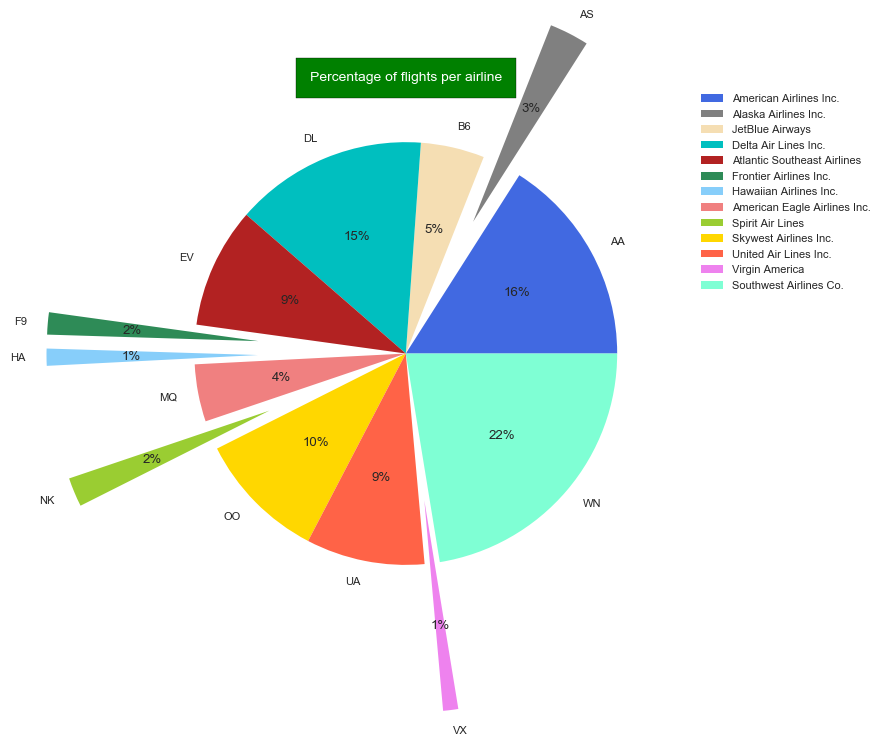

In [415]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import table

plt.figure(figsize=(15,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
sizes  = depart_stats['Count_delayed_depart'].values
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

explode = [0.7 if sizes[i] < 20000 else 0.0 for i in range(len(depart_stats))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=depart_stats.index, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)

# plt.legend(depart_stats.AIRLINE_NAMES,loc=5)
plt.legend(depart_stats.AIRLINE_NAMES,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_title('Percentage of flights per airline', bbox={'facecolor':'green', 'pad':10},
              color = 'w',fontsize=10)


**a) From the above pie chart, it seems that some flights are in abundance as compared to the rest. For example, Southwest Airlines accounts for  ∼ 18% of the flights which is similar to the total number of flights chartered by the 7 small airlines such as Hawaiin, Alaska Airlines etc. Thus, justifying what google says about Southwest airlines: Southwest Airlines Co. is a major United States airline headquartered in Dallas, Texas, and is the world’s largest low-cost carrier.**

---------------------------------------------------------------------------------------------------------------



**2. Mean delay per airline**

Text(0.5,1,'Mean delay per airline')

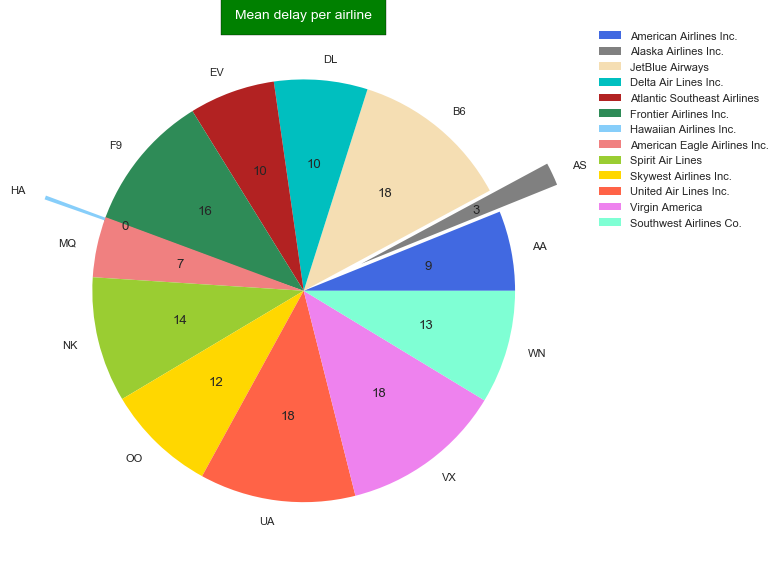

In [416]:
plt.figure(figsize=(15,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
sizes  = depart_stats['Mean_delayed_depart'].values

colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format
explode = [0.3 if sizes[i] < 5 else 0.0 for i in range(len(depart_stats))]
patches, texts, autotexts = ax1.pie(sizes, 
                                labels=depart_stats.index, explode= explode, colors = colors,  autopct=autopct_format(sizes),
                                shadow=False, startangle=0)

# plt.legend(depart_stats.AIRLINE_NAMES,loc=5)
plt.legend(depart_stats.AIRLINE_NAMES,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_title('Mean delay per airline', bbox={'facecolor':'green', 'pad':10},color = 'w',fontsize=10)


**a) From this pie chart, we can see that a value of ∼ 11 ± 7 minutes is representing majority of mean delays irrespective of the number of flights per airline.** 

**b) Also, it's safe to say that with such a low mean delay, majority of the airlines adhere to their schedule. However, we also see that occasionally, we can face really large delays that might reach a few tens of hours!**

**c) I would also like to point out that most of the flights showed no delay. As a result, the majority portion of values while calculating the mean was 0 which in turn led to the normalization of the mean. To get a more accurate idea about the delay we should consider only those values where the delay was greater than zero that is the flight actually got delayed.**


### 4. Analyzing delay statistics when the delay was greater than zero

In [419]:
#Dataframe containing only those departure flights which have a delay
delay_flights_depart = flights_dec.ix[(flights_dec['DEPARTURE_DELAY'] > 0)]
delay_flights_arrival = flights_dec.ix[(flights_dec['ARRIVAL_DELAY'] > 0)]

# delay_flights

count_depart = delay_flights_depart['DEPARTURE_DELAY'].groupby(delay_flights_depart['AIRLINE']).count()
stats_depart_delay= pd.DataFrame()
stats_depart_delay['Count of depart flights with delay'] = count_depart

count_arriv = delay_flights_arrival['ARRIVAL_DELAY'].groupby(delay_flights_arrival['AIRLINE']).count()
stats_arrival_delay= pd.DataFrame()
stats_arrival_delay['Count of arrival flights with delay'] = count_arriv


mean_departure = delay_flights_depart['DEPARTURE_DELAY'].groupby(delay_flights_depart['AIRLINE']).mean()
mean_arrival = delay_flights_arrival['ARRIVAL_DELAY'].groupby(delay_flights_arrival['AIRLINE']).mean()
stats_depart_delay['Mean_delayed_depart'] = mean_departure
stats_arrival_delay['Mean_arrival_arrival'] = mean_arrival

min_departure = delay_flights_depart['DEPARTURE_DELAY'].groupby(delay_flights_depart['AIRLINE']).min()
min_arrival = delay_flights_arrival['ARRIVAL_DELAY'].groupby(delay_flights_arrival['AIRLINE']).min()
stats_depart_delay['Min_delayed_depart'] = min_departure
stats_arrival_delay['Min_arrival_arrival'] = min_arrival

max_departure = delay_flights_depart['DEPARTURE_DELAY'].groupby(delay_flights_depart['AIRLINE']).max()
max_arrival = delay_flights_arrival['ARRIVAL_DELAY'].groupby(delay_flights_arrival['AIRLINE']).max()
stats_depart_delay['Max_delayed_depart'] = max_departure
stats_arrival_delay['Max_arrival_arrival'] = max_arrival

In [421]:
stats_depart_delay =stats_depart_delay.reset_index()
stats_depart_delay

,AIRLINE,Count of depart flights with delay,Mean_delayed_depart,Min_delayed_depart,Max_delayed_depart
0,AA,26910,33.389223,1.0,1649.0
1,AS,4023,25.897340,1.0,803.0
2,B6,11380,41.926450,1.0,1006.0
3,DL,25228,35.244213,1.0,1228.0
4,EV,13128,44.533745,1.0,1274.0
5,F9,3284,48.070341,1.0,781.0
6,HA,1554,14.019949,1.0,1095.0
7,MQ,5282,40.693487,1.0,1278.0
8,NK,4807,37.858332,1.0,723.0
9,OO,16669,44.602976,1.0,1378.0


In [422]:
stats_depart_delay['AIRLINE_NAMES'] = stats_depart_delay['AIRLINE'].map(names_airlines)
stats_depart_delay = stats_depart_delay[['AIRLINE','AIRLINE_NAMES','Count of depart flights with delay','Mean_delayed_depart','Min_delayed_depart','Max_delayed_depart']]

stats_depart_delay = stats_depart_delay.set_index('AIRLINE')
print('  Statistical properties of departure flights with a delay greater than 0mins grouped by airlines:')
stats_depart_delay

  Statistical properties of departure flights with a delay greater than 0mins grouped by airlines:


,AIRLINE_NAMES,Count of depart flights with delay,Mean_delayed_depart,Min_delayed_depart,Max_delayed_depart
AIRLINE,,,,,
AA,American Airlines Inc.,26910,33.389223,1.0,1649.0
AS,Alaska Airlines Inc.,4023,25.897340,1.0,803.0
B6,JetBlue Airways,11380,41.926450,1.0,1006.0
DL,Delta Air Lines Inc.,25228,35.244213,1.0,1228.0
EV,Atlantic Southeast Airlines,13128,44.533745,1.0,1274.0
F9,Frontier Airlines Inc.,3284,48.070341,1.0,781.0
HA,Hawaiian Airlines Inc.,1554,14.019949,1.0,1095.0
MQ,American Eagle Airlines Inc.,5282,40.693487,1.0,1278.0
NK,Spirit Air Lines,4807,37.858332,1.0,723.0


**1. Southwest Airlines(WN) not only has the most number of flights, but also the most number of delayed flights in December.**

**2. The mean delay of almost all the airlines has increased. Thus, confirming my hypothesis that the larger number of flights with a delay of 0 was normalizing the mean delay per airline thus producing such a lower mean delay.**


(-4, 80)

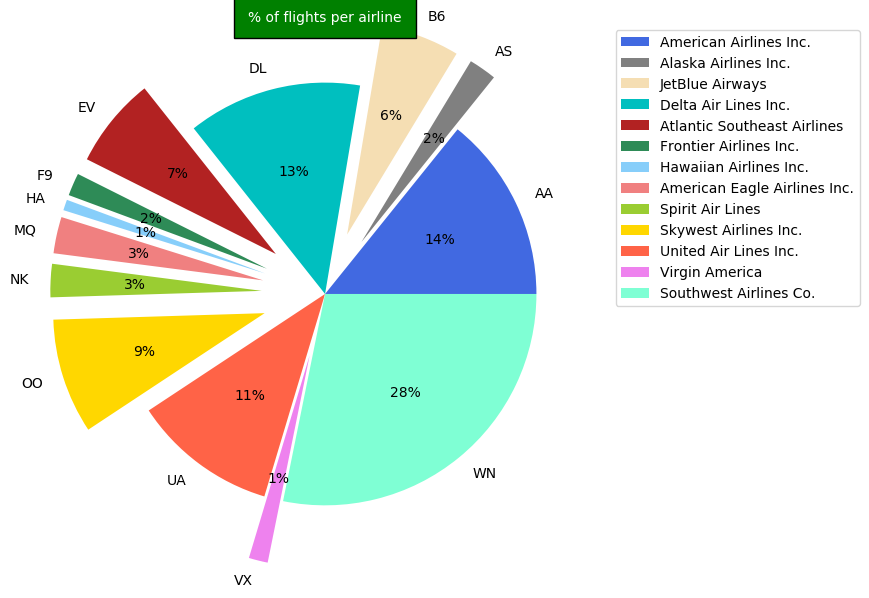

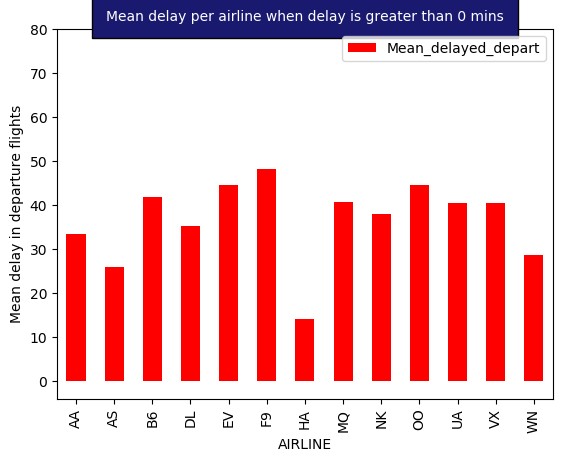

In [423]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
sizes  = stats_depart_delay['Count of depart flights with delay'].values
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']

explode = [0.3 if sizes[i] < 20000 else 0.0 for i in range(len(stats_depart_delay))]
patches, texts, autotexts = ax1.pie(sizes, explode = explode,
                                labels=stats_depart_delay.index, colors = colors,  autopct='%1.0f%%',
                                shadow=False, startangle=0)

# plt.legend(depart_stats.AIRLINE_NAMES,loc=5)
plt.legend(stats_depart_delay.AIRLINE_NAMES,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax1.set_title('% of flights per airline', bbox={'facecolor':'green', 'pad':10},
              color = 'w',fontsize=10)



 
ax = stats_depart_delay.plot.bar(x= stats_depart_delay.index, y='Mean_delayed_depart',color='red')
ax.set_title('Mean delay per airline when delay is greater than 0 mins', bbox={'facecolor':'midnightblue', 'pad':10},color = 'w',fontsize=10)

plt.ylabel("Mean delay in departure flights")
plt.ylim([-4,80])

**a) As we can see in the above pie chart,SouthWest Airlines(WN) with the highest number of flights has the highest number of delayed flights as well. This indicates that higher the total number of flights, higher is the amount of delayed flights for a particular airline.**

**b) Also, as we can see from the above bar graph, the mean delay per airline has increased from ∼11 ± 7 minutes to ∼30 ± 10 minutes.** 

----------------------------------------------------------------------------------------------------------------------

#### Time for another graph!!!! 

#### 5. Distinguishing between the magnitude of departure delay per airline 

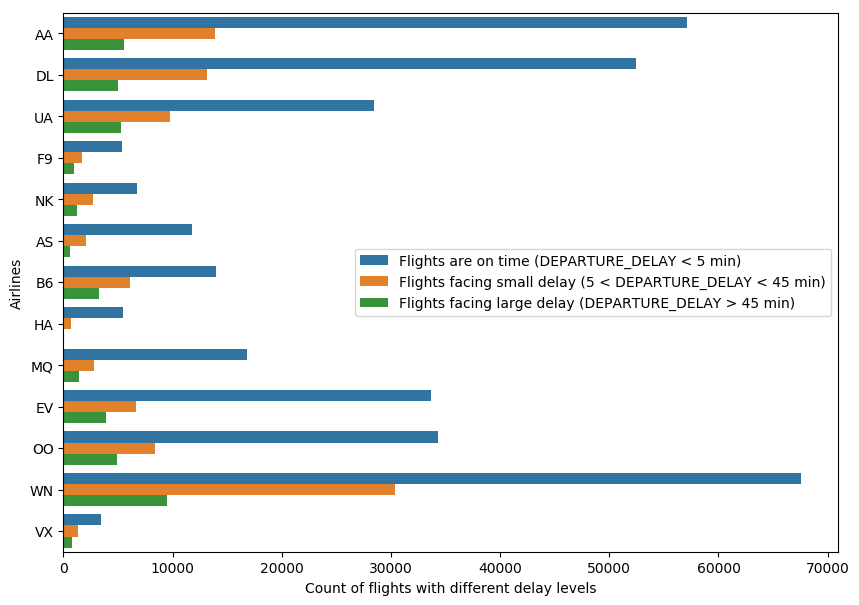

In [424]:
import seaborn as sns
flights_dec1 = flights_dec

delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flights_dec1['DELAY_LEVEL'] = flights_dec1['DEPARTURE_DELAY'].apply(delay_type)

fig = plt.figure(1, figsize=(10,7))
my_colors = 'rgb'  #red, green, blue, black, etc.

ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=flights_dec1)
plt.xlabel("Count of flights with different delay levels")
plt.ylabel("Airlines")


legends = plt.legend()
legends.get_texts()[0].set_text('Flights are on time (DEPARTURE_DELAY < 5 min)')
legends.get_texts()[1].set_text('Flights facing small delay (5 < DEPARTURE_DELAY < 45 min)')
legends.get_texts()[2].set_text('Flights facing large delay (DEPARTURE_DELAY > 45 min)')
plt.show()

**a) To distinguish between the magnitude of departure delay, I have categorized the flights into three broad categories based on their departure delay:**

* Flights which are on time : Delay < 5 mins
* Flights with a short delay:  5 mins < Delay < 45 mins
* Flights with a long delay: Delay > 45 mins


**b) From the above graph, we can see that delays greater than 45 minutes only account for a few percentage of flights.Most of the flights fall in the category of being delayed by less than 5 mins.**  

----------------------------------------------------------------------------------------------------------------------

In [485]:
names_airlines

{'AA': 'American Airlines Inc.',
 'AS': 'Alaska Airlines Inc.',
 'B6': 'JetBlue Airways',
 'DL': 'Delta Air Lines Inc.',
 'EV': 'Atlantic Southeast Airlines',
 'F9': 'Frontier Airlines Inc.',
 'HA': 'Hawaiian Airlines Inc.',
 'MQ': 'American Eagle Airlines Inc.',
 'NK': 'Spirit Air Lines',
 'OO': 'Skywest Airlines Inc.',
 'UA': 'United Air Lines Inc.',
 'US': 'US Airways Inc.',
 'VX': 'Virgin America',
 'WN': 'Southwest Airlines Co.'}

                            Do Airports affect the delay? Time to find out!

In [ ]:
airport_mean_delays = pd.DataFrame(pd.Series(df['ORIGIN_AIRPORT'].unique()))
airport_mean_delays.set_index(0, drop = True, inplace = True)

for carrier in abbr_companies.keys():
    df1 = df[df['AIRLINE'] == carrier]
    test = df1['DEPARTURE_DELAY'].groupby(df['ORIGIN_AIRPORT']).apply(get_stats).unstack()
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

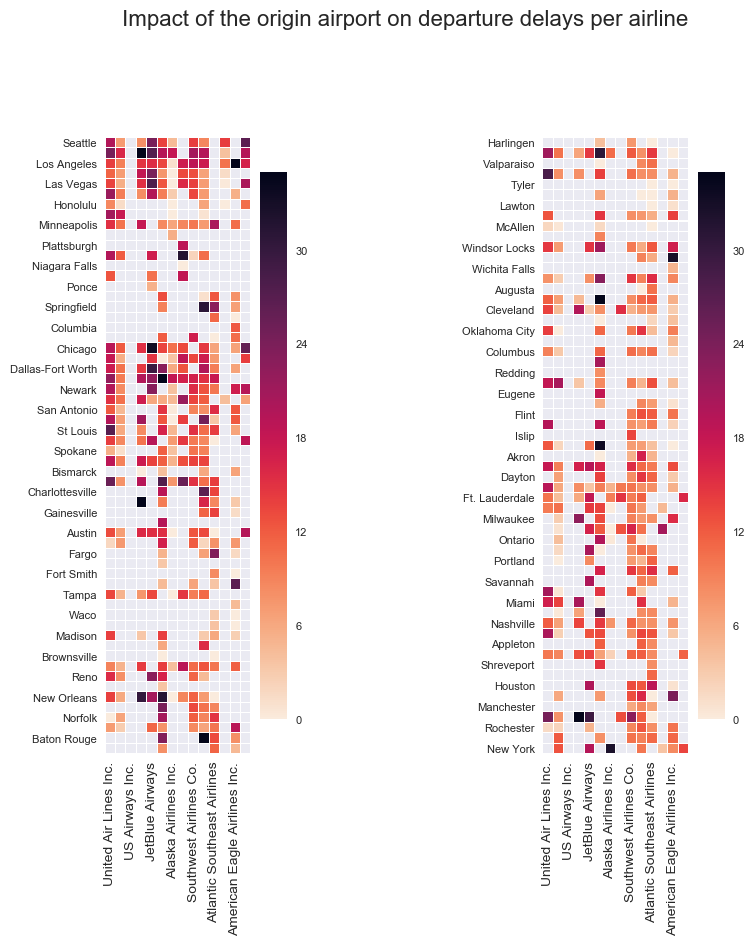

In [493]:
heat_df = flights_dec[['AIRLINE_NAMES','AIRLINE','ORIGIN_AIRPORT','DEPARTURE_DELAY']].copy()
heat_df

heat_df1 = pd.DataFrame(pd.Series(heat_df['ORIGIN_AIRPORT'].unique()))
heat_df1.set_index(0, drop = True, inplace = True)
for i in names_airlines.keys():
    df1 = heat_df[heat_df['AIRLINE'] == i]
    test = df1['DEPARTURE_DELAY'].groupby(heat_df['ORIGIN_AIRPORT']).mean()
    heat_df1[i] = pd.DataFrame(test)
#     heat_df[i] = test.loc[:,'mean']
    
    
    
heat_df1

sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))
fig.text(0.5, 1.02, "Impact of the origin airport on departure delays per airline", ha='center', fontsize = 16)
ax = fig.add_subplot(1,3,1)
identify_airport = airports.set_index('IATA_CODE')['CITY'].to_dict()
subset = heat_df1.iloc[:60,:].rename(columns = names_airlines)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01,cmap = sns.cm.rocket_r, mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 90) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,3,3)
subset = heat_df1.iloc[61:120,:].rename(columns = names_airlines)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01,cmap = sns.cm.rocket_r, mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 90) ;
ax.yaxis.label.set_visible(False)

**Looking at the above heatmap, I get an idea about delays associated with Airlines and the airports. For example, I see that the column associated with United Air Lines Inc mostly reports large delays, while the column associated with US airways Inc is mainly associated with delays of less than 10 minutes. Similarly, Dalls Fort Worth airport shows large delays while Columbus shows lower values of delays. 
Thus, if I want to correctly analyze delays further, it would be better to confine the analysis to a particular airline or an airport as the average delays vary a lot which might introduce biases if the data is taken in its entirety.**

                   Why is my flight always late?! (Finding the majority cause of delay per airline) 

In the dataset, I have been provided with various factors of delay like weather, air system, security etc.
Here, I am trying to find out which of these factors is most frequent.

However, the dataset in the context of these factors is skewed. There are a lot of NA values and the amount of available data too isn't approximately same for these factors. Since there is no way to know why the values were NA (either they were not recorded or they didn't occur), I'll just assume this is my complete data and count the frequencies of each kind of delay and plot it.

In [40]:
flights_new = flights1[['DATE', 'AIRLINE', 'FLIGHT_NUMBER',
        'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY']].copy()

flights_new = flights_new[flights_new['DATE'] >= '2015-12-01']
flights_new= flights_new.reset_index()
flights_new


,index,DATE,AIRLINE,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,5339849,2015-12-01,AA,1230,4.0,-17.0,0.0,0.0,0.0,0.0,0.0
1,5339850,2015-12-01,DL,1426,-1.0,-4.0,0.0,0.0,0.0,0.0,0.0
2,5339851,2015-12-01,AA,2406,-3.0,-8.0,0.0,0.0,0.0,0.0,0.0
3,5339852,2015-12-01,UA,680,-4.0,-30.0,0.0,0.0,0.0,0.0,0.0
4,5339853,2015-12-01,AA,883,-2.0,5.0,0.0,0.0,0.0,0.0,0.0
5,5339854,2015-12-01,AA,2020,-4.0,-32.0,0.0,0.0,0.0,0.0,0.0
6,5339855,2015-12-01,F9,1456,-1.0,-28.0,0.0,0.0,0.0,0.0,0.0
7,5339856,2015-12-01,NK,298,-6.0,-7.0,0.0,0.0,0.0,0.0,0.0
8,5339857,2015-12-01,AA,448,6.0,-12.0,0.0,0.0,0.0,0.0,0.0
9,5339858,2015-12-01,DL,1969,1.0,-32.0,0.0,0.0,0.0,0.0,0.0


In [41]:
flights_new = flights_new.drop('index',axis=1)

In [42]:
air_delay =  flights_new[flights_new['AIR_SYSTEM_DELAY'] > 0]
air_delay = air_delay.reset_index()

air_delay = air_delay.drop('index',axis=1)
air_delay

,DATE,AIRLINE,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-12-01,AS,134,10.0,16.0,6.0,0.0,0.0,10.0,0.0
1,2015-12-01,AA,481,30.0,27.0,27.0,0.0,0.0,0.0,0.0
2,2015-12-01,NK,597,-4.0,24.0,24.0,0.0,0.0,0.0,0.0
3,2015-12-01,AS,136,7.0,15.0,8.0,0.0,7.0,0.0,0.0
4,2015-12-01,AA,1531,-2.0,16.0,16.0,0.0,0.0,0.0,0.0
5,2015-12-01,AA,2274,20.0,23.0,3.0,0.0,20.0,0.0,0.0
6,2015-12-01,OO,6232,8.0,84.0,76.0,0.0,0.0,0.0,8.0
7,2015-12-01,OO,7362,60.0,84.0,24.0,0.0,0.0,0.0,60.0
8,2015-12-01,AA,1255,37.0,102.0,65.0,0.0,37.0,0.0,0.0
9,2015-12-01,AA,1925,-1.0,19.0,19.0,0.0,0.0,0.0,0.0


In [43]:
security_delay =  flights_new[flights_new['SECURITY_DELAY'] > 0]
security_delay = security_delay.reset_index()
security_delay =security_delay.drop('index',axis=1)
security_delay

,DATE,AIRLINE,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-12-01,WN,2742,7.0,20.0,13.0,7.0,0.0,0.0,0.0
1,2015-12-01,NK,231,30.0,26.0,0.0,26.0,0.0,0.0,0.0
2,2015-12-01,VX,407,39.0,26.0,0.0,26.0,0.0,0.0,0.0
3,2015-12-01,WN,289,30.0,20.0,0.0,7.0,0.0,13.0,0.0
4,2015-12-01,B6,325,59.0,43.0,0.0,31.0,0.0,12.0,0.0
5,2015-12-02,MQ,3349,32.0,44.0,12.0,32.0,0.0,0.0,0.0
6,2015-12-02,AS,549,13.0,21.0,8.0,13.0,0.0,0.0,0.0
7,2015-12-02,AA,565,112.0,106.0,0.0,106.0,0.0,0.0,0.0
8,2015-12-02,B6,597,50.0,27.0,0.0,10.0,0.0,17.0,0.0
9,2015-12-02,B6,221,45.0,52.0,7.0,25.0,0.0,20.0,0.0


In [44]:
airline_delay =  flights_new[flights_new['AIRLINE_DELAY'] > 0]
airline_delay = airline_delay.reset_index()
airline_delay =airline_delay.drop('index',axis=1)
airline_delay

,DATE,AIRLINE,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-12-01,AS,136,7.0,15.0,8.0,0.0,7.0,0.0,0.0
1,2015-12-01,AA,1171,42.0,24.0,0.0,0.0,24.0,0.0,0.0
2,2015-12-01,AA,2274,20.0,23.0,3.0,0.0,20.0,0.0,0.0
3,2015-12-01,MQ,3452,29.0,19.0,0.0,0.0,19.0,0.0,0.0
4,2015-12-01,AA,1255,37.0,102.0,65.0,0.0,37.0,0.0,0.0
5,2015-12-01,DL,1662,7.0,33.0,26.0,0.0,7.0,0.0,0.0
6,2015-12-01,DL,1991,8.0,15.0,7.0,0.0,8.0,0.0,0.0
7,2015-12-01,MQ,3051,62.0,69.0,7.0,0.0,62.0,0.0,0.0
8,2015-12-01,MQ,3431,21.0,15.0,0.0,0.0,15.0,0.0,0.0
9,2015-12-01,MQ,3556,38.0,24.0,0.0,0.0,24.0,0.0,0.0


In [45]:
late_aircraft_delay =  flights_new[flights_new['LATE_AIRCRAFT_DELAY'] > 0]
late_aircraft_delay = late_aircraft_delay.reset_index()
late_aircraft_delay =late_aircraft_delay.drop('index',axis=1)
late_aircraft_delay

,DATE,AIRLINE,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-12-01,AS,134,10.0,16.0,6.0,0.0,0.0,10.0,0.0
1,2015-12-01,NK,168,36.0,17.0,0.0,0.0,0.0,17.0,0.0
2,2015-12-01,UA,550,198.0,174.0,0.0,0.0,110.0,64.0,0.0
3,2015-12-01,NK,612,13.0,21.0,8.0,0.0,5.0,8.0,0.0
4,2015-12-01,EV,5821,19.0,29.0,10.0,0.0,1.0,18.0,0.0
5,2015-12-01,EV,4128,35.0,28.0,21.0,0.0,0.0,7.0,0.0
6,2015-12-01,F9,722,42.0,36.0,0.0,0.0,0.0,36.0,0.0
7,2015-12-01,WN,222,39.0,41.0,2.0,0.0,34.0,5.0,0.0
8,2015-12-01,DL,309,309.0,291.0,0.0,0.0,0.0,291.0,0.0
9,2015-12-01,UA,258,138.0,95.0,0.0,0.0,22.0,73.0,0.0


In [46]:
weather_delay =  flights_new[flights_new['WEATHER_DELAY'] > 0]
weather_delay = weather_delay.reset_index()
weather_delay =weather_delay.drop('index',axis=1)
weather_delay

,DATE,AIRLINE,FLIGHT_NUMBER,DEPARTURE_DELAY,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015-12-01,OO,6232,8.0,84.0,76.0,0.0,0.0,0.0,8.0
1,2015-12-01,OO,7362,60.0,84.0,24.0,0.0,0.0,0.0,60.0
2,2015-12-01,MQ,3604,15.0,51.0,36.0,0.0,0.0,0.0,15.0
3,2015-12-01,OO,5158,34.0,62.0,28.0,0.0,0.0,0.0,34.0
4,2015-12-01,DL,1967,8.0,37.0,29.0,0.0,0.0,0.0,8.0
5,2015-12-01,AA,1489,11.0,21.0,10.0,0.0,0.0,0.0,11.0
6,2015-12-01,OO,4767,343.0,366.0,23.0,0.0,0.0,0.0,343.0
7,2015-12-01,VX,174,95.0,105.0,95.0,0.0,0.0,0.0,10.0
8,2015-12-01,WN,1939,26.0,35.0,9.0,0.0,0.0,0.0,26.0
9,2015-12-01,AS,861,16.0,27.0,11.0,0.0,0.0,0.0,16.0


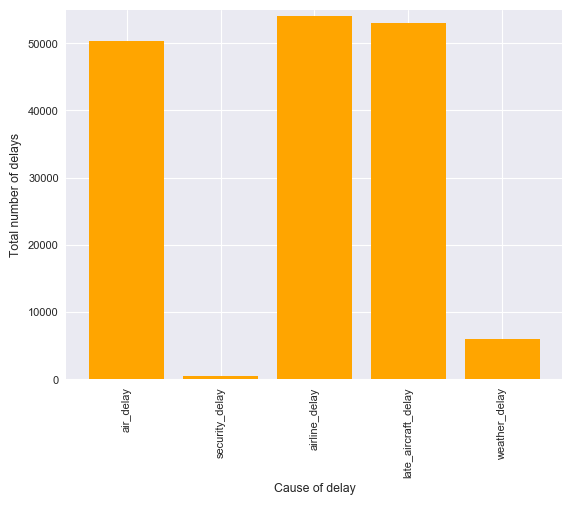

In [47]:
d = {'air_delay':len(air_delay),'security_delay':len(security_delay),'airline_delay':len(airline_delay),
     'late_aircraft_delay':len(late_aircraft_delay),'weather_delay':len(weather_delay)}

names = list(d.keys())
values = list(d.values())

#tick_label does the some work as plt.xticks()
plt.bar(range(len(d)),values, color = 'orange')
plt.xticks(range(len(d)),names,rotation = 90)
plt.ylabel('Total number of delays')
plt.xlabel('Cause of delay')
plt.grid(True)
plt.ylim((0,55000))
plt.show()


Here, I see, the maximum impact is caused by airline delay and late aircraft delay while the lowest is by security delay. This indicates the delays are mainly caused by the airline and the aircraft rather than other external factors but considering the dataset is skewed, I can't reliably confirm this currently. 

                                            Mirror, Mirror on the wall
                                       Which Airline is the best of them all

It will be useful to know which airline is the best in terms of delay. I am trying to rank them using a metric of my own which directly depends on the probability of delay and the mean delay of that airline.

**metric = Probability of delay for an airline * mean Delay of the airline**

OR

**metric = (Count of delayed flights of an airline / Total Flights of the airline) * mean Delay of the airline**

Lower value of this metric would mean more efficiency of the airline in terms of delay

In [428]:
airline_rank = pd.DataFrame()
airline_rank = depart_stats[['AIRLINE_NAMES','Count_delayed_depart']].copy()
# airline_rank = stats_depart_delay[['Count of depart flights with delay','Mean_delayed_depart']].copy()
airline_rank.rename(columns={'AIRLINE_NAMES': 'Airline_Name', 'Count_delayed_depart': 'Total_Flights'}, inplace=True)
airline_rank = pd.concat([airline_rank, stats_depart_delay['Count of depart flights with delay']], axis=1)
airline_rank = pd.concat([airline_rank, stats_depart_delay['Mean_delayed_depart']],axis=1)
airline_rank.rename(columns={'Count of depart flights with delay': 'Delayed_Flights', 'Mean_delayed_depart': 'Mean_Delay'}, inplace=True)
airline_rank


,Airline_Name,Total_Flights,Delayed_Flights,Mean_Delay
AIRLINE,,,,
AA,American Airlines Inc.,76562,26910,33.389223
AS,Alaska Airlines Inc.,14459,4023,25.897340
B6,JetBlue Airways,23343,11380,41.926450
DL,Delta Air Lines Inc.,70639,25228,35.244213
EV,Atlantic Southeast Airlines,44140,13128,44.533745
F9,Frontier Airlines Inc.,8120,3284,48.070341
HA,Hawaiian Airlines Inc.,6260,1554,14.019949
MQ,American Eagle Airlines Inc.,20993,5282,40.693487
NK,Spirit Air Lines,10671,4807,37.858332


In [429]:
airline_rank['Metric'] = (airline_rank['Delayed_Flights']/airline_rank['Total_Flights'])* airline_rank['Mean_Delay']

In [430]:
airline_rank = airline_rank.set_index('Airline_Name')
airline_rank=airline_rank.sort_values(by=['Metric'])
airline_rank['Rank_of_airline'] = range(1, 1+len(airline_rank))
airline_rank
airline_rank

,Total_Flights,Delayed_Flights,Mean_Delay,Metric,Rank_of_airline
Airline_Name,,,,,
Hawaiian Airlines Inc.,6260,1554,14.019949,3.480351,1
Alaska Airlines Inc.,14459,4023,25.897340,7.205547,2
American Eagle Airlines Inc.,20993,5282,40.693487,10.238794,3
American Airlines Inc.,76562,26910,33.389223,11.735639,4
Delta Air Lines Inc.,70639,25228,35.244213,12.587112,5
Atlantic Southeast Airlines,44140,13128,44.533745,13.245106,6
Southwest Airlines Co.,107476,53361,28.580536,14.190015,7
Skywest Airlines Inc.,47590,16669,44.602976,15.622757,8
Spirit Air Lines,10671,4807,37.858332,17.054165,9


Text(0,0.5,'Airline')

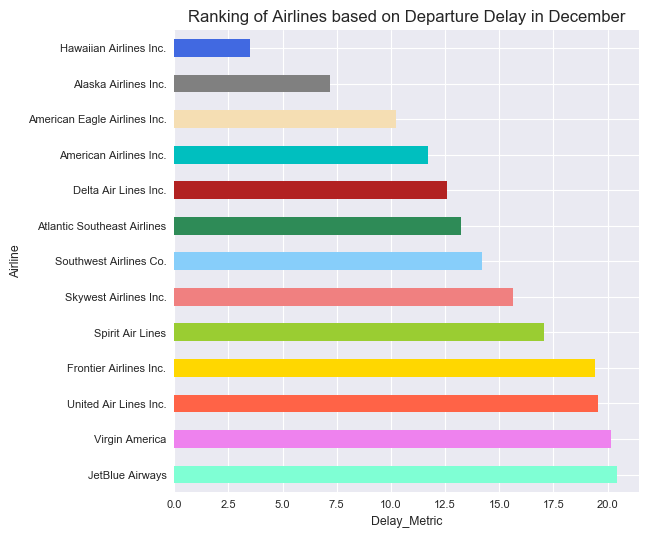

In [431]:
#plt.figure()
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
airline_rank['Metric'].plot.barh(figsize = (6,6),color=colors).invert_yaxis()
plt.title("Ranking of Airlines based on Departure Delay in December", ha='center', fontsize = 12)
plt.xlabel('Delay_Metric')
plt.ylabel('Airline')



**The above graph shows that the most efficient airline, or the most punctual airline, is the Hawaiian Airlines.**

                                    Mirror, repeat for the airports please
                                      (Best airport in terms of delay)
                                    
                                        
Following the same approach as for the ranking of airlines, I am now ranking the airports based upon the delay.

In [52]:
count_depart_all = flights_dec1['DEPARTURE_DELAY'].groupby(flights_dec1['ORIGIN_AIRPORT']).count()
airport_rank_all= pd.DataFrame()
airport_rank_all['Count of flights per airport'] = count_depart_all

mean_depart_all = flights_dec1['DEPARTURE_DELAY'].groupby(flights_dec1['ORIGIN_AIRPORT']).mean()
airport_rank_all['Mean delay per airport'] = mean_depart_all
airport_rank_all

,Count of flights per airport,Mean delay per airport
ORIGIN_AIRPORT,,
ABE,154,7.350649
ABI,211,4.729858
ABQ,1627,15.524892
ABR,62,19.387097
ABY,76,9.026316
ACT,152,2.802632
ACV,125,17.832000
ACY,298,2.969799
ADK,9,-9.000000


In [54]:
flight_dec2 = flights_dec1.ix[(flights_dec1['DEPARTURE_DELAY'] > 0)]
# flight_dec2

count_depart = flight_dec2['DEPARTURE_DELAY'].groupby(flight_dec2['ORIGIN_AIRPORT']).count()
airport_rank= pd.DataFrame()
airport_rank['Count of delayed flights per airport'] = count_depart

mean_depart = flight_dec2['DEPARTURE_DELAY'].groupby(flight_dec2['ORIGIN_AIRPORT']).mean()
airport_rank['Mean delay per airport'] = mean_depart

airport_rank

,Count of delayed flights per airport,Mean delay per airport
ORIGIN_AIRPORT,,
ABE,39,40.282051
ABI,40,54.275000
ABQ,773,36.993532
ABR,22,59.636364
ABY,25,36.800000
ACT,24,61.666667
ACV,53,48.169811
ACY,75,29.853333
ADK,2,21.000000


In [55]:
AIRPORT_rank = pd.DataFrame()
AIRPORT_rank = airport_rank_all[['Count of flights per airport']].copy()

AIRPORT_rank = pd.concat([AIRPORT_rank, airport_rank['Count of delayed flights per airport']], axis=1)
AIRPORT_rank  = pd.concat([AIRPORT_rank , airport_rank['Mean delay per airport']],axis=1)

AIRPORT_rank

,Count of flights per airport,Count of delayed flights per airport,Mean delay per airport
ORIGIN_AIRPORT,,,
ABE,154,39,40.282051
ABI,211,40,54.275000
ABQ,1627,773,36.993532
ABR,62,22,59.636364
ABY,76,25,36.800000
ACT,152,24,61.666667
ACV,125,53,48.169811
ACY,298,75,29.853333
ADK,9,2,21.000000


In [56]:
AIRPORT_rank['Metric_airport'] = (AIRPORT_rank['Count of delayed flights per airport']/AIRPORT_rank['Count of flights per airport'])* AIRPORT_rank['Mean delay per airport']

AIRPORT_rank=AIRPORT_rank.sort_values(by=['Metric_airport'])
AIRPORT_rank['Rank_of_airports'] = range(1, 1+len(AIRPORT_rank))
AIRPORT_rank

,Count of flights per airport,Count of delayed flights per airport,Mean delay per airport,Metric_airport,Rank_of_airports
ORIGIN_AIRPORT,,,,,
BRD,54,4,7.250000,0.537037,1
CDV,60,6,20.500000,2.050000,2
ADQ,30,5,14.200000,2.366667,3
ITO,505,125,9.912000,2.453465,4
GUM,31,10,7.800000,2.516129,5
ALO,58,8,21.250000,2.931034,6
SCC,77,17,13.411765,2.961039,7
YUM,176,37,17.702703,3.721591,8
BRO,198,26,30.730769,4.035354,9


In [57]:
airport_rank_top20 = AIRPORT_rank.iloc[:20,:]
airport_rank_top20

,Count of flights per airport,Count of delayed flights per airport,Mean delay per airport,Metric_airport,Rank_of_airports
ORIGIN_AIRPORT,,,,,
BRD,54,4,7.250000,0.537037,1
CDV,60,6,20.500000,2.050000,2
ADQ,30,5,14.200000,2.366667,3
ITO,505,125,9.912000,2.453465,4
GUM,31,10,7.800000,2.516129,5
ALO,58,8,21.250000,2.931034,6
SCC,77,17,13.411765,2.961039,7
YUM,176,37,17.702703,3.721591,8
BRO,198,26,30.730769,4.035354,9


Text(0,0.5,'Airports')

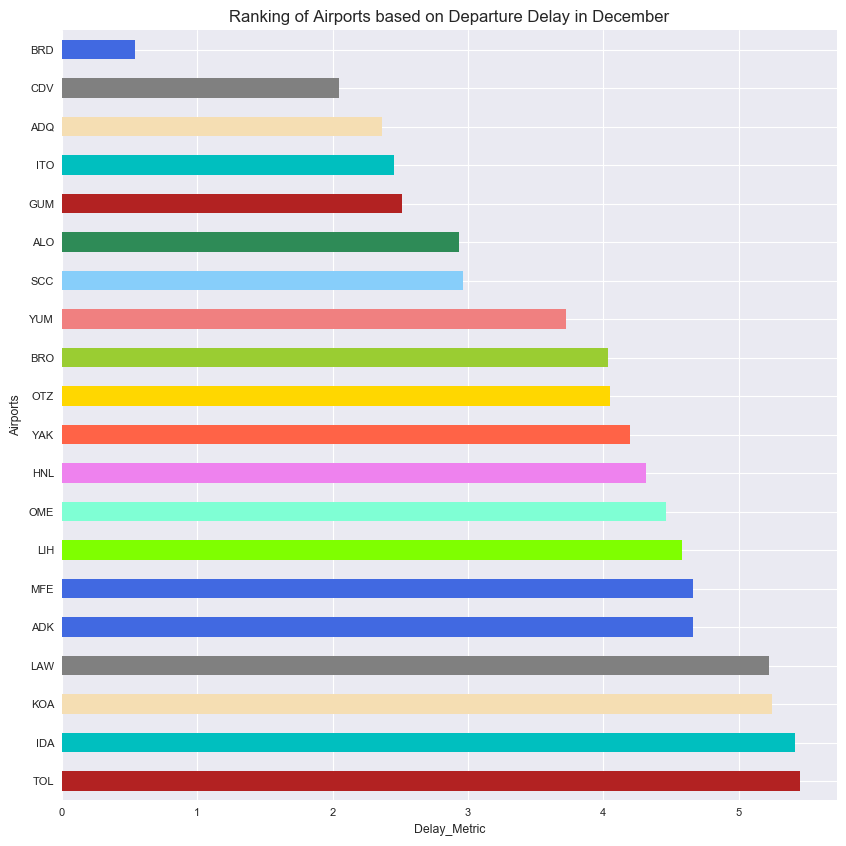

In [58]:
colors = ['royalblue', 'grey', 'wheat', 'c', 'firebrick', 'seagreen', 'lightskyblue',
          'lightcoral', 'yellowgreen', 'gold', 'tomato', 'violet', 'aquamarine', 'chartreuse']
airport_rank_top20['Metric_airport'].plot.barh(figsize = (10,10),color=colors).invert_yaxis()
plt.title("Ranking of Airports based on Departure Delay in December", ha='center', fontsize = 12)
plt.xlabel('Delay_Metric')
plt.ylabel('Airports')


1.  BRD: Brainerd Lakes Regional Airport
2.  CDV: Cordova Airport 
3.  ADQ: Kodiak Benny Benson State Airport
4.  ITO: Hilo International Airport
5.  GUM: Antonio B. Won Pat International Airport
6.  ALO: Waterloo Regional Airport
7.  SCC: Deadhorse Airport
8.  YUM: Yuma International Airport
9.  BRO: Brownsville/South Padre Island International Airport
10. OTZ: Ralph Wien Memorial Airport

As I can see, the top 10 airports according to our metric are not in big cities. It implies that airports in smaller cities suffer fewer delays which maybe due to less traffic.

                                      Let's analyze Cancellations, shall we? 

                                     Airline: Master, I have failed you!
                             (Insights about the number of flights cancelled per airline)

Flights get cancelled due to many reasons. Here I am trying to find which airline is the most prone to cancellations.

In [59]:
can_flight = flights1[['DATE','DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON']].copy()
can_flight = can_flight[can_flight['DATE'] >= '2015-12-01']
can_flight= can_flight.reset_index()
can_flight =can_flight.drop('index',axis=1)
can_flight



,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON
0,2015-12-01,2,AA,1230,SEA,4.0,-17.0,0,0,0
1,2015-12-01,2,DL,1426,SFO,-1.0,-4.0,0,0,0
2,2015-12-01,2,AA,2406,LAX,-3.0,-8.0,0,0,0
3,2015-12-01,2,UA,680,SFO,-4.0,-30.0,0,0,0
4,2015-12-01,2,AA,883,SFO,-2.0,5.0,0,0,0
5,2015-12-01,2,AA,2020,PHX,-4.0,-32.0,0,0,0
6,2015-12-01,2,F9,1456,LAS,-1.0,-28.0,0,0,0
7,2015-12-01,2,NK,298,LAS,-6.0,-7.0,0,0,0
8,2015-12-01,2,AA,448,SLC,6.0,-12.0,0,0,0
9,2015-12-01,2,DL,1969,PHX,1.0,-32.0,0,0,0


In [60]:
can_flight_1 = can_flight[can_flight['CANCELLED'] == 1].copy()
can_flight_1= can_flight_1.reset_index()
can_flight_1 =can_flight_1.drop('index',axis=1)
can_flight_1

# can_flight['CANCELLED']

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON
0,2015-12-01,2,WN,1294,LAX,0.0,0.0,0,1,A
1,2015-12-01,2,WN,3197,LAS,0.0,0.0,0,1,A
2,2015-12-01,2,AA,1764,FLL,0.0,0.0,0,1,A
3,2015-12-01,2,EV,2760,TUL,0.0,0.0,0,1,A
4,2015-12-01,2,AA,2462,DFW,0.0,0.0,0,1,A
5,2015-12-01,2,OO,5295,ORD,-7.0,0.0,0,1,B
6,2015-12-01,2,OO,4813,SEA,0.0,0.0,0,1,B
7,2015-12-01,2,EV,4640,EWR,0.0,0.0,0,1,C
8,2015-12-01,2,B6,1512,RSW,0.0,0.0,0,1,A
9,2015-12-01,2,EV,4749,STL,0.0,0.0,0,1,C


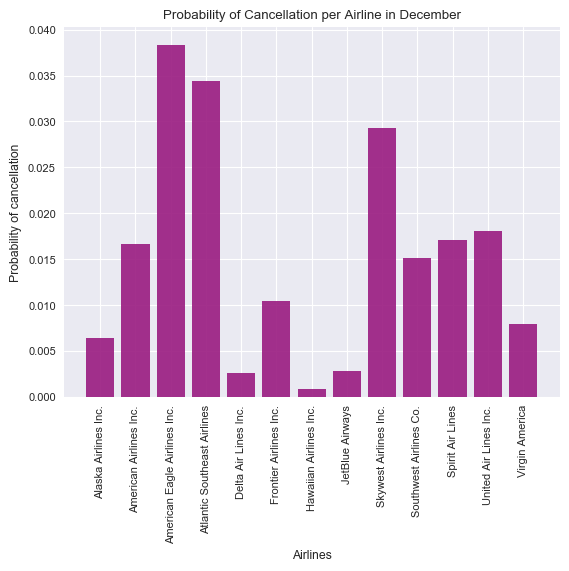

In [435]:
#Count of cancelled flights per airline in December 
count_cancel = can_flight_1['CANCELLED'].groupby(can_flight_1['AIRLINE']).count()
cancel_stats= pd.DataFrame()
cancel_stats['Count of cancelled flights per airline'] = count_cancel
#Count of all flights per airline in December
count_all = can_flight['CANCELLED'].groupby(can_flight['AIRLINE']).count()
cancel_stats['Count of all flights per airline'] = count_all
#Probability of cancellation per airline  
cancel_stats['Probability of cancellation'] = (cancel_stats['Count of cancelled flights per airline']/cancel_stats['Count of all flights per airline'])
cancel_stats = pd.concat([cancel_stats, depart_stats['AIRLINE_NAMES']], axis=1)
cancel_stats


plt.bar(x=cancel_stats['AIRLINE_NAMES'], height=cancel_stats["Probability of cancellation"], color = (0.6,0.1,0.5,0.9))
plt.title('Probability of Cancellation per Airline in December')
plt.xlabel('Airlines')
plt.ylabel('Probability of cancellation')
plt.xticks(rotation=90)

plt.show()


The above graph shows the American Eagle Airlines has the maximum probability of cancellation while that of Hawaiian Airlines is negligible.

                                    Why is the flight cancelled though?

Dataset contains 3 different types of cancellation codes- A,B,C which stand for:
1.  A: Air Carrier
2.  B: Extreme Weather
3.  C: National Aviation System (NAS) 

Firstly, I am trying to analyze, for each airline, which of these reasons is the most probable cause for a flight being cancelled. 

In [62]:
#Count of cancelled flights per airline in December 
count_cancel_res = can_flight_1['AIRLINE'].groupby(can_flight_1['CANCELLATION_REASON']).count()
cancel_stats_res= pd.DataFrame()
cancel_stats_res['Reason count'] = count_cancel_res
cancel_stats_res

,Reason count
CANCELLATION_REASON,
A,1579
B,5613
C,871


In [63]:
dataf = can_flight_1.groupby(['AIRLINE','CANCELLATION_REASON']).count()
a = pd.DataFrame(dataf['CANCELLED'])

In [111]:
dataaa = can_flight_1.groupby(['AIRLINE','CANCELLATION_REASON'])
dataaa.describe()

ARRIVAL_DELAY                                     \
                                    count mean  std  min  25%  50%  75%  max   
AIRLINE CANCELLATION_REASON                                                    
AA      A                           247.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                           974.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                            57.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
AS      A                            22.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                            59.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                            12.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
B6      A                            33.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                            33.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
DL      A                           138.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                            46.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                             1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0   
EV      A                           266.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                           750.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                           501.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
F9      A                            16.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                            69.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
HA      A                             5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
MQ      A                            39.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                           738.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                            28.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
NK      A                            42.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                           113.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                            27.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
OO      A                           155.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                          1157.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                            83.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
UA      A                           211.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                           565.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                            10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
VX      A                            14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                             2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                            28.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
WN      A                           391.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        B                          1140.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
        C                            91.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                            CANCELLED        ...   DIVERTED       \
                                count mean   ...        75%  max   
AIRLINE CANCELLATION_REASON                  ...                   
AA      A                       247.0  1.0   ...        0.0  0.0   
        B                       974.0  1.0   ...        0.0  0.0   
        C                        57.0  1.0   ...        0.0  0.0   
AS      A                        22.0  1.0   ...        0.0  0.0   
        B                        59.0  1.0   ...        0.0  0.0   
        C                        12.0  1.0   ...        0.0  0.0   
B6      A                        33.0  1.0   ...        0.0  0.0   
        C                        33.0  1.0   ...        0.0  0.0   
DL      A                       138.0  1.0   ...        0.0  0.0   
        B                        46.0  1.0   ...        0.0  0.0   
        C                         1.0  1.0   ...        0.0  0.0   
EV      A                       266

Text(0,0.5,'Number of cancelled flights')

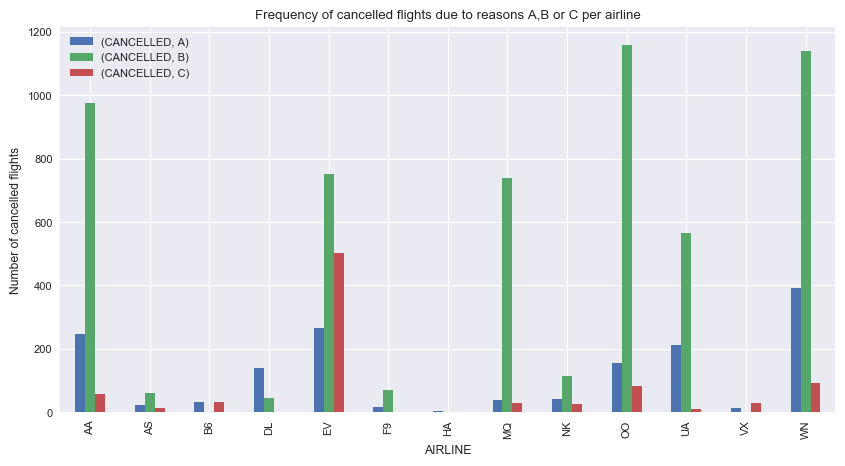

In [64]:
a.unstack().plot(kind='bar',legend = False, figsize = (10,5))
plt.title('Frequency of cancelled flights due to reasons A,B or C per airline')
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
plt.ylabel('Number of cancelled flights')


Here I see, for the majority of the airlines the most common cause for cancellation is B: Extreme weather.

                                       THE MOST ACTIVE DAY and DATE!

Everybody has a preference, day wise, for travelling. Some may prefer weekends while some prefer mid-week, etc. It seemed interesting to try and find which day is the busiest day of the week.

In [97]:
df_busyday = pd.DataFrame(can_flight.groupby('DAY_OF_WEEK').count()['DEPARTURE_DELAY'])
d = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
df_busyday["Day"] = pd.Series(d)


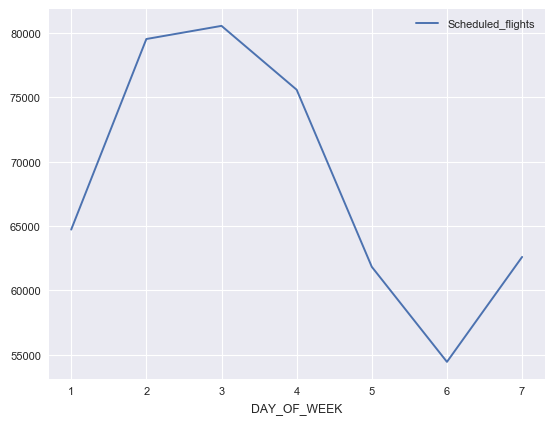

In [99]:
#Do these first...

# df_busyday= df_busyday.reset_index()
# df_busyday= df_busyday.set_index('Day')
# df_busyday= df_busyday.drop('Day',axis=1)
df_busyday = df_busyday.rename(columns={'DEPARTURE_DELAY': 'Scheduled_flights'})

# # Plotting 
df_busyday.plot()


This graph has some interesting conclusions. We can see Sunday and Monday (7 and 1) are approximately equally busy.
The business keeps increasing from Monday through Wednesday and then Drops a little on thursday and then drops drastically till Saturday indicating most people avoid travelling over the weekends.

**Similar to days, here I try to analyze the busiest dates.**

In [350]:
can_flight

,DATE,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON
0,2015-12-01,2,AA,1230,SEA,4.0,-17.0,0,0,0
1,2015-12-01,2,DL,1426,SFO,-1.0,-4.0,0,0,0
2,2015-12-01,2,AA,2406,LAX,-3.0,-8.0,0,0,0
3,2015-12-01,2,UA,680,SFO,-4.0,-30.0,0,0,0
4,2015-12-01,2,AA,883,SFO,-2.0,5.0,0,0,0
5,2015-12-01,2,AA,2020,PHX,-4.0,-32.0,0,0,0
6,2015-12-01,2,F9,1456,LAS,-1.0,-28.0,0,0,0
7,2015-12-01,2,NK,298,LAS,-6.0,-7.0,0,0,0
8,2015-12-01,2,AA,448,SLC,6.0,-12.0,0,0,0
9,2015-12-01,2,DL,1969,PHX,1.0,-32.0,0,0,0


Text(0,0.5,'Frequency of flights')

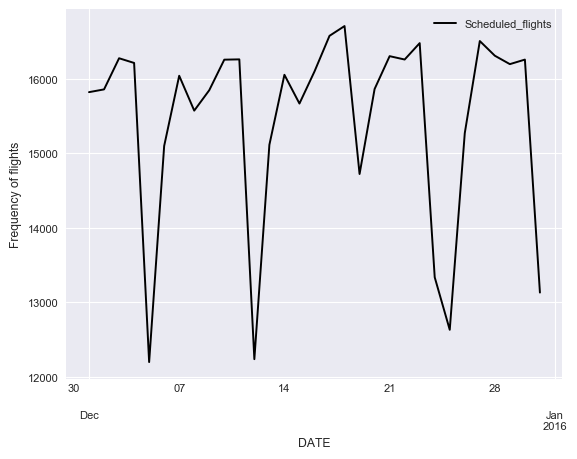

In [369]:
df_busydate = pd.DataFrame(can_flight.groupby('DATE').count()['DEPARTURE_DELAY'])

# df_busydate
df_busydate = df_busydate.rename(columns={'DEPARTURE_DELAY': 'Scheduled_flights'})
df_busydate.plot(grid=True,color = '000')
plt.ylabel('Frequency of flights')


Here I see the busiest date was around 18 December, i.e. middle of the month.
Also, the rise and fall pattern that I saw in the previous plot is repeated to a large extent here too where the business increased till mid-week and then drops. 
Another interesting observation is the business drops drastically on Christmas and is very high before and after Christmas which makes sense as people will travel to and from homes for Christmas.

                                             PREDICTION

Next step in my analysis is performing a prediction. Based on the departure hour, I am trying to predict the delay. But this would involve some data manipulation. Each day, the hour would reset after 24hours to 0. This data doesn't lend itself to performing a regression. Hence, instead of resetting it to 0, I am increasing the hours sequentially for example, 25 would mean 1am of the next day, 26 would be 2am, 48 would be 12am of the next day, so on and so forth.

In [100]:
flights_dec

,DATE,AIRLINE,AIRLINE_NAMES,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DELAY_LEVEL
0,2015-12-01,AA,American Airlines Inc.,1230,SEA,DFW,2015-12-01 00:05:00,00:09:00,4.0,05:55:00,05:38:00,-17.0,0
1,2015-12-01,DL,Delta Air Lines Inc.,1426,SFO,MSP,2015-12-01 00:05:00,00:04:00,-1.0,05:40:00,05:36:00,-4.0,0
2,2015-12-01,AA,American Airlines Inc.,2406,LAX,DFW,2015-12-01 00:10:00,00:07:00,-3.0,05:01:00,04:53:00,-8.0,0
3,2015-12-01,UA,United Air Lines Inc.,680,SFO,ORD,2015-12-01 00:14:00,00:10:00,-4.0,06:32:00,06:02:00,-30.0,0
4,2015-12-01,AA,American Airlines Inc.,883,SFO,CLT,2015-12-01 00:15:00,00:13:00,-2.0,08:05:00,08:10:00,5.0,0
5,2015-12-01,AA,American Airlines Inc.,2020,PHX,CLT,2015-12-01 00:15:00,00:11:00,-4.0,06:01:00,05:29:00,-32.0,0
6,2015-12-01,F9,Frontier Airlines Inc.,1456,LAS,ATL,2015-12-01 00:20:00,00:19:00,-1.0,07:05:00,06:37:00,-28.0,0
7,2015-12-01,NK,Spirit Air Lines,298,LAS,IAH,2015-12-01 00:25:00,00:19:00,-6.0,05:05:00,04:58:00,-7.0,0
8,2015-12-01,AA,American Airlines Inc.,448,SLC,CLT,2015-12-01 00:25:00,00:31:00,6.0,06:08:00,05:56:00,-12.0,1
9,2015-12-01,DL,Delta Air Lines Inc.,1969,PHX,ATL,2015-12-01 00:25:00,00:26:00,1.0,05:52:00,05:20:00,-32.0,0


In [112]:
pred_df = flights_dec[['DATE','AIRLINE','ORIGIN_AIRPORT','SCHEDULED_DEPARTURE','DEPARTURE_DELAY']].copy()
pred_df

,DATE,AIRLINE,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY
0,2015-12-01,AA,SEA,2015-12-01 00:05:00,4.0
1,2015-12-01,DL,SFO,2015-12-01 00:05:00,-1.0
2,2015-12-01,AA,LAX,2015-12-01 00:10:00,-3.0
3,2015-12-01,UA,SFO,2015-12-01 00:14:00,-4.0
4,2015-12-01,AA,SFO,2015-12-01 00:15:00,-2.0
5,2015-12-01,AA,PHX,2015-12-01 00:15:00,-4.0
6,2015-12-01,F9,LAS,2015-12-01 00:20:00,-1.0
7,2015-12-01,NK,LAS,2015-12-01 00:25:00,-6.0
8,2015-12-01,AA,SLC,2015-12-01 00:25:00,6.0
9,2015-12-01,DL,PHX,2015-12-01 00:25:00,1.0


Firstly, before converting the hours to aforementioned format I am dividing the dataset into train and test where the test dataset is the last week of the month and training set is the first 3 weeks

In [137]:
df_train = pred_df[pred_df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) < datetime.date(2015, 12, 23)]
df_test  = pred_df[pred_df['SCHEDULED_DEPARTURE'].apply(lambda x:x.date()) > datetime.date(2015, 12, 23)]
# pred_df1 = df_train

In [181]:
def flight_delays_seconds(df_train, carrier, extreme_values = False):
    
    df_train2 = df_train[(df_train['AIRLINE'] == carrier)].copy()
    
    # Removing values with a delay of greater than 60 mins before fitting the regression model
    if extreme_values:
        df_train2['DEPARTURE_DELAY'] = df_train2['DEPARTURE_DELAY'].apply(lambda x:x if x < 60 else np.nan)
        df_train2.dropna(how = 'any')
    # Conversion: date + hour -> hour
    df_train2.sort_values('SCHEDULED_DEPARTURE', inplace = True)
    df_train2['depart_hour'] =  df_train2['SCHEDULED_DEPARTURE'].apply(lambda x:x.time())
    #___________________________________________________________________
    # Grouping of flights by departure time 
    temp2 = df_train2['DEPARTURE_DELAY'].groupby(df_train2['depart_hour']).apply(get_stats).unstack()
    temp2.reset_index(inplace=True)
    #___________________________________
    # Converting time into seconds
    fct = lambda x:x.hour*3600+x.minute*60+x.second
    temp2.reset_index(inplace=True)
    temp2['depart_hour_min'] = temp2['depart_hour'].apply(fct)
    return temp2

def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': group.mean()}

#### Predicting mean delay per airline at a particular hour in December when the dataset does not contain extreme values 

In [130]:
import sklearn
from sklearn.linear_model import LinearRegression



Case1: Sequential spliting of dataset 

In [248]:
#Sequentially splitting the dataset into train and test and after that, fitting polynomial regression model to my dataset
#Train dataset
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
test2 = flight_delays_seconds(df_train,'AA', True)
train = test2[['mean', 'depart_hour_min']].dropna(how='any', axis = 0)
X_train = np.array(train['depart_hour_min'])
Y_train = np.array(train['mean'])
X_train = X_train.reshape(len(X_train),1)
Y_train = Y_train.reshape(len(Y_train),1)

#Test dataset
test2 = flight_delays_seconds(df_test,'AA', True)
test = test2[['mean', 'depart_hour_min']].dropna(how='any', axis = 0)
X_test = np.array(test['depart_hour_min'])
Y_test = np.array(test['mean'])
X_test = X_test.reshape(len(X_test),1)
Y_test = Y_test.reshape(len(Y_test),1)


regr1 = LinearRegression()
poly = PolynomialFeatures(degree = 3)
Xpoly = poly.fit_transform(X_train)
regr1.fit(Xpoly, Y_train)
Xpolytest = poly.fit_transform(X_test)
result = regr1.predict(Xpolytest)
print('Mean squared error:', mean_squared_error(result,Y_test))


Mean squared error: 53.3788657830045


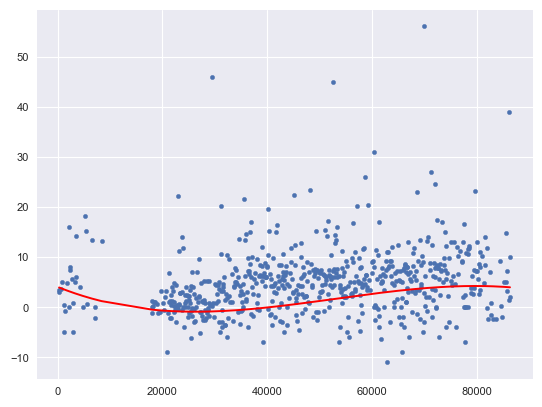

In [249]:
plt.scatter(X_test, Y_test, s=10)
plt.plot(X_test, result, color='r')
plt.show()


The data was sequential for this prediction and we got a MSE of 53. From the plot we can see the fit isn't the very best. So now I try random splitting of the dataset and predicting.

Case2: Random splitting of the dataset

In [253]:
#Randomly Splitting the dataset using train_test_split and fitting polynomial regression model to the dataset
test2 = flight_delays_seconds(pred_df,'AA', True).dropna(how='any', axis = 0)
X = np.array(test2['depart_hour_min'])
Y = np.array(test2['mean'])
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)

regr1 = LinearRegression()
poly = PolynomialFeatures(degree = 3)
Xpoly = poly.fit_transform(X_train)
regr1.fit(Xpoly, Y_train)
Xpolytest = poly.fit_transform(X_test)
result_poly = regr1.predict(Xpolytest)
print('Mean squared error:', mean_squared_error(result_poly,Y_test))


Mean squared error: 27.019758245776718


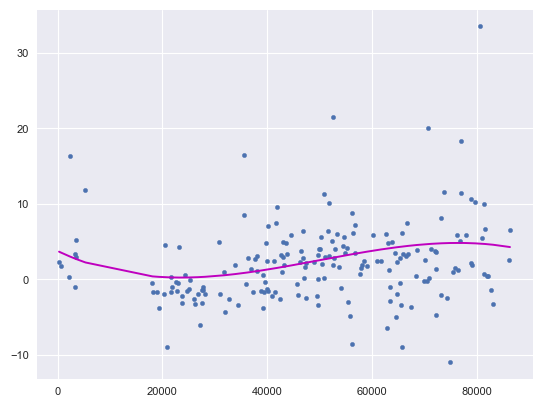

In [254]:
import operator
plt.scatter(X_test, Y_test, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test,result_poly), key=sort_axis)
X_test, result_poly = zip(*sorted_zip)
plt.plot(X_test, result_poly, color='m')
plt.show()

After random splitting, the MSE obtained is much better(27) and the plot too seems like a good fit. 
But there is still one problem. This is a polynomial regression. To choose the best degree for the polynomial I will have to try different degrees but since the data will always be split randomly by the train_test_split it will introduce a bias. So instead, I will use cross validation now.

In [323]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

data = flight_delays_seconds(pred_df,'AA', True).dropna(how='any', axis = 0)
X = np.array(data['depart_hour_min'])
Y = np.array(data['mean'])
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)



In [324]:
def cross_val_score_method(pol_degree, k_folds):
    regress = LinearRegression()
    poly = PolynomialFeatures(degree = pol_degree)
    Xpoly = poly.fit_transform(X)
    score = np.mean(cross_val_score(regress, Xpoly,Y, cv = k_folds, scoring = 'neg_mean_squared_error'))
    return score

k_folds= 20
for pol_degree in range(1,8): 
    score = cross_val_score_method(pol_degree,k_folds)
    print('n={} -> MSE = {}'.format(pol_degree, round(abs(score),3)))



n=1 -> MSE = 30.248
n=2 -> MSE = 31.745
n=3 -> MSE = 34.538
n=4 -> MSE = 31.854
n=5 -> MSE = 30.342
n=6 -> MSE = 29.757
n=7 -> MSE = 29.988


With this cross-validation, we can see the best degree for the polynomial is 6 with the lowest MSE.

                                            CLASSIFICATION

Now, I try to classify whether a flight got delayed or not based on Arrival Delay.
I am considering a flight as delayed only if the arrival delay is greater than 15 minutes or in other words, given a margin of 15minutes for a flight to be considered as actually delayed.

In [436]:
#Rearranging the columns of flights1 dataframe
flights_class = flights1[['DATE','AIRLINE','DEPARTURE_TIME', 'AIR_TIME', 'DISTANCE','ARRIVAL_DELAY']].copy()
flights_class = flights_class[flights_class['DATE'] >= '2015-12-01']
flights_class = flights_class.reset_index()
flights_class= flights_class.drop('DATE',axis=1)
flights_class = flights_class.drop('index',axis=1)





In [438]:
#flights_class = flights_class.drop('DATE',axis=1)
flights_class

,AIRLINE,DEPARTURE_TIME,AIR_TIME,DISTANCE,ARRIVAL_DELAY
0,AA,9.0,194.0,1660,-17.0
1,DL,4.0,196.0,1589,-4.0
2,AA,7.0,141.0,1235,-8.0
3,UA,10.0,216.0,1846,-30.0
4,AA,13.0,264.0,2296,5.0
5,AA,11.0,182.0,1773,-32.0
6,F9,19.0,174.0,1747,-28.0
7,NK,19.0,135.0,1222,-7.0
8,AA,31.0,188.0,1727,-12.0
9,DL,26.0,155.0,1587,-32.0


In [439]:
import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split

flights_class.dropna(inplace=True)

flights_class["ARRIVAL_DELAY"] = (flights_class["ARRIVAL_DELAY"]>15)*1

cols = ["AIRLINE"]
for item in cols:
    flights_class[item] = flights_class[item].astype("category").cat.codes +1

train, test, y_train, y_test = train_test_split(flights_class.drop(["ARRIVAL_DELAY"], axis=1), flights_class["ARRIVAL_DELAY"],
                                                random_state=10, test_size=0.4)
train,y_train

(        AIRLINE  DEPARTURE_TIME  AIR_TIME  DISTANCE
 407821       13          1245.0      71.0       484
 226944        7          1744.0      22.0       100
 194966       13          1800.0     158.0      1381
 385912        1           543.0      94.0       602
 246850       10           520.0      50.0       306
 233021       13           742.0     144.0      1189
 410050        1          1536.0      95.0       599
 60735        13          1805.0      40.0       237
 140753        5           701.0      38.0       192
 66066         4           731.0     141.0       867
 401309       13           549.0     145.0      1050
 29667         9          2011.0      62.0       406
 4606          5          1004.0      42.0       212
 25764         3          1537.0      21.0        94
 94437        13           806.0     152.0       971
 360259        2           600.0     128.0       978
 58633        13          1558.0      44.0       239
 290500       10          1657.0     118.0    

Now that I have converted arrival delay into a binary label, I will convert airlines as features. Basically, this will be a one hot encoding i.e. for each entry, I will create an array with 13 indices as there are 13 airlines in December. Each index of the array will correspond to a particular airline and only that value will be 1 while others would be 0.

In [440]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit(train["AIRLINE"].values.reshape(-1, 1))  

enc.feature_indices_
airline_onehot = enc.transform(train["AIRLINE"].values.reshape(-1, 1)).toarray()
airline_onehot_test = enc.transform(test["AIRLINE"].values.reshape(-1, 1)).toarray()


In [442]:
#airline_onehot_test.shape
air_oh_df = pd.DataFrame(airline_onehot, columns = ["A1","A2","A3","A4","A5","A6","A7",
                                                    "A8","A9","A10","A11","A12","A13"])
air_oh_test_df = pd.DataFrame(airline_onehot_test, columns = ["A1","A2","A3","A4","A5","A6","A7",
                                                         "A8","A9","A10","A11","A12","A13"])
train2 = pd.concat([train.reset_index(),air_oh_df.reset_index()],axis=1).drop(["index","MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"],axis=1)
test2  = pd.concat([test.reset_index(),air_oh_test_df.reset_index()],axis=1).drop(["index","MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"],axis=1)

test2

,DEPARTURE_TIME,AIR_TIME,DISTANCE,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
0,1654.0,60.0,368,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1157.0,61.0,372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,800.0,44.0,277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,827.0,96.0,650,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,158.0,208.0,1608,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1206.0,46.0,200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,757.0,207.0,1452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,1735.0,51.0,223,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,519.0,54.0,406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,136.0,171.0,1448,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


I am using a XGBOOST model and my training features are Departure time, air time, distance and the airline encoded as one-hot-vector.

In [469]:
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder

def auc(m, train, test): 
    predict1 = m.predict_proba(test)[:,1]
    metric1 = metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1])
    metric2 = metrics.roc_auc_score(y_test, predict1)
    return metric1, metric2, predict1


start_time = time.time()

model = xgb.XGBClassifier(max_depth=20, min_child_weight=1,  n_estimators=100,
                          n_jobs=-1 , verbose=1, learning_rate=0.001)
model.fit(train2, y_train)

metric1,metric2,predict1 = auc(model, train2, test2)
print(metric1,metric2)
finish_time = time.time()
total_time = finish_time - start_time

print('Elapsed time: ', total_time)

0.806219018804422 0.7204933985417705
Elapsed time:  100.4878511428833


After parameter tuning, the best training accuracy I got is and the the testing accuracy is 

                                            Conclusion

Now I have a fair idea of which airlines and airports are the most efficient in terms of delay. I have a model that can predict departure delays, and another model that can classify arrival delays.
Though done purely for learning the different concepts, I am sure such information and analysis can be somehow leveraged and converted into a business that helps the people in choosing the best flight, helps the airline in scheduling and improving their service, likewise for the airport.
Thank you for your patience as I covered all the concepts and I hope I made myself as clear as possible.